
# Capstone Project - Highmark Health

## Exploration

In [1]:
# produces summary of a given dataset
def brief (data):
    # import libraries
    import numpy as np
    from pandas.api.types import is_numeric_dtype
    
    # find the dimensions of data set and print them out
    shape = data.shape
    print("This dataset has "+ str(shape[0]) + " rows and " + str (shape[1]) + " columns \n")
    
    ######## Following block of code computes and displays the descriptive stats for real valued columns #########
    ##############################################################################################################
    
    # create a new datafram. This dataframe will be used for storing descriptive stats of real valued variables
    real_desc_stats = pd.DataFrame()
    
    # create an ID varaible. This will serve as the Attribute_ID. 
    # It will be updated as we loop over the dataset's columns 
    attribute_id = 0
    
    # create an iterator variable to access i th row in dataframe
    itr = 1
    
    # This for loop iterates over all the columns of the given data set
    for col in data:
        
        # increment the id by 1 for each iteration
        attribute_id = attribute_id+1
        
        # Proceed with computation of descriptive stats for numeric attributes only (int, float)
        if is_numeric_dtype (data[col]):
            
            # compute the desired descriptive stats and 
            # store them in relevant columns of numeric attributes' dataframe 
            real_desc_stats.loc[itr,'Attribute_id'] = str(round(attribute_id))
            real_desc_stats.loc[itr,'Attribute_name'] = col
            real_desc_stats.loc[itr,'Missing'] = data.loc[:,col].isnull().sum()
            real_desc_stats.loc[itr,'Mean'] = round(np.nanmean(data[col]),2)
            real_desc_stats.loc[itr,'Median'] = round(np.nanmedian(data[col]),2)
            real_desc_stats.loc[itr,'Sdev'] = round(np.nanstd(data[col]),2)
            real_desc_stats.loc[itr,'Min'] = round(min(data[col]),2)
            real_desc_stats.loc[itr,'Max'] = round(max(data[col]),2)
            
            # increment the iterator by 1 only when we add a row in dataframe corresponding to a numeric attribute
            itr = itr + 1
                
    #print descriptive stats for real valued variables
    print("")
    print("real valued attributes:")
    print(real_desc_stats)
    
    ###### the block of code for computing and displaying descriptive stats of real valued columns ends here ##### 
    ##############################################################################################################
    
    
    
    ######### Following block of code computes and displays the descriptive stats for Symbolic columns ###########
    ##############################################################################################################
    
    
    # create a new datafram. This dataframe will be used for storing descriptive stats of symbolic variables
    symbolic_desc_stats = pd.DataFrame()
    
    # Reset the attribute id varaible to zero. 
    # It will be updated as we loop over the dataset's columns
    attribute_id = 0
    
    # reset iterator variable to 1 (it accesses i th row in dataframe)
    itr = 1
    
    # This for loop iterates over all the columns of the given data set
    for col in data:
        
        # increment the id by 1 for each iteration
        attribute_id = attribute_id+1
        
        # if the attribute is of numeric type (int, float), then do nothing
        if is_numeric_dtype (data[col]):
            pass
        
        # if the attribute is not of numeric type i-e it is symbolic,
        # then proceed with computation of its descreptive stats
        else :
            
            # Update ID, Name, and Missing columns for the attribute
            # and store them in relevant columns of symbolic attributes' dataframe
            symbolic_desc_stats.loc[itr,'Attribute_id'] = str(round(attribute_id))
            symbolic_desc_stats.loc[itr,'Attribute_name'] = col
            symbolic_desc_stats.loc[itr,'Missing'] = data.loc[:,col].isnull().sum()
            
            
            ###########################################################################
            ### This block of code implements the logic for dynamically calcualting 
            ### up to 3 most common values (with most frequent first)
            
            # initalize the string variable which will be used to store the MCVs_count in the desired format
            mcv_string=""
            
            # get the counts of all unique values that the attribute has. Size of this variable will give us the arity
            mcv = data[col].value_counts().sort_values(ascending=False)
            
            # get the keys (unique values that the variable can take) corresponding to each count
            mcv_keys = mcv.keys()
            
            # The for loop below if condition creates the MCVs_count output. If the number of 
            # unqiue values for the attribute is <= 3 then run the loop equal to the number of unique
            # values that the columns has
            if mcv.size < 4:
                for i in range(mcv.size):
                    mcv_string = mcv_string + str(mcv_keys[i]) + "(" + str(mcv[i]) +") "
            
            # The for loop below else condition creates the MCVs_count output. If the number of 
            # unqiue values for the attribute is >= 4 then run the loop only 3 times as we only 
            # need to report up to 3 MCVs
            else:
                for i in range(3):
                    mcv_string = mcv_string + str(mcv_keys[i]) + "(" + str(mcv[i]) +") "
            ############################################################################
            
            # The size of mcv varaible gives us the arity. Store it in the arity column
            symbolic_desc_stats.loc[itr,'arity'] = mcv.size
            
            # Store the MCVs counts in the MCVs_counts column
            symbolic_desc_stats.loc[itr,'MCVs_counts'] = mcv_string
            
            # increment the iterator by 1 only when we add a row in dataframe corresponding to a symbolic attribute
            itr = itr + 1
    
    # Print the descriptive stats for symbolic attribute
    print("")
    print("symbolic attributes:")
    print(symbolic_desc_stats)
    
    ####### the block of code for computing and displaying descriptive stats of symbolic columns ends here ######
    #############################################################################################################

In [2]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

In [3]:
# read file - takes a few seconds. Patience is appreciated
provider_info = pd.read_excel('../Raw Data Sets/Marked ProviderInfo_Download_HCS Comments.xlsx')

In [4]:
# assumes first sheet in the excel workbook is contains the data of interest(We can select sheet name now.)
# assumes the first row in excel sheet contains the column headers(It is now.)
# read file - takes a few seconds. Patience is appreciated

xls_puf = pd.ExcelFile('../Raw Data Sets/Marked_SNF PUF - Provider Final 2016_HCS Clear Header.xlsx')
snf_puf = pd.read_excel(xls_puf, "Provider")

In [5]:
# read file
contract_info = pd.read_csv('../Raw Data Sets/Marked_CPSC_Contract_Info_2018_12.csv',encoding='ISO-8859-1')

In [6]:
# read file
enrolment_info = pd.read_csv('../Raw Data Sets/Marked_CPSC_Enrollment_Info_2018_12.csv')

## Feature Selection

In [7]:
# read file
skilled_nursing_facility = pd.read_csv('../Raw Data Sets/Skilled Nursing Facility Quality Reporting Program - Provider data.csv',encoding='ISO-8859-1')
skilled_nursing_facility

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,2,4,5,7,8,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


CMS Certification Number (CCN)  \
0                              85001.0   
1                              85001.0   
2                              85001.0   
3                              85001.0   
4                              85001.0   
5                              85001.0   
6                              85001.0   
7                              85001.0   
8                              85001.0   
9                              85001.0   
10                             85001.0   
11                             85001.0   
12                             85001.0   
13                             85001.0   
14                             85001.0   
15                             85001.0   
16                             85001.0   
17                             85001.0   
18                             85001.0   
19                             85001.0   
20                             85001.0   
21                             85001.0   
22                             85001.0   
23                             85001.0   
24                             85001.0   
25                             85001.0   
26                             85002.0   
27                             85002.0   
28                             85002.0   
29                             85002.0   
...                                ...   
395638                             NaN   
395639                             NaN   
395640                             NaN   
395641                             NaN   
395642                             NaN   
395643                             NaN   
395644                             NaN   
395645                             NaN   
395646                             NaN   
395647                             NaN   
395648                             NaN   
395649                             NaN   
395650                             NaN   
395651                             NaN   
395652                             NaN   
395653                             NaN   
395654                             NaN   
395655                             NaN   
395656                             NaN   
395657                             NaN   
395658                             NaN   
395659                             NaN   
395660                             NaN   
395661                             NaN   
395662                             NaN   
395663                             NaN   
395664                             NaN   
395665                             NaN   
395666                             NaN   
395667                             NaN   

                                        Facility Name        Address Line 1  \
0       KENTMERE REHABILITATION AND HEALTHCARE CENTER  1900 LOVERING AVENUE   
1       KENTMERE REHABILITATION AND HEALTHCARE CENTER  1900 LOVERING AVENUE   
2       KENTMERE REHABILITATION AND HEALTHCARE CENTER  1900 LOVERING AVENUE   
3       KENTMERE REHABILITATION AND HEALTHCARE CENTER  1900 LOVERING AVENUE   
4       KENTMERE REHABILITATION AND HEALTHCARE CENTER  1900 LOVERING AVENUE   
5       KENTMERE REHABILITATION AND HEALTHCARE CENTER  1900 LOVERING AVENUE   
6       KENTMERE REHABILITATION AND HEALTHCARE CENTER  1900 LOVERING AVENUE   
7       KENTMERE REHABILITATION AND HEALTHCARE CENTER  1900 LOVERING AVENUE   
8       KENTMERE REHABILITATION AND HEALTHCARE CENTER  1900 LOVERING AVENUE   
9       KENTMERE REHABILITATION AND HEALTHCARE CENTER  1900 LOVERING AVENUE   
10      KENTMERE REHABILITATION AND HEALTHCARE CENTER  1900 LOVERING AVENUE   
11      KENTMERE REHABILITATION AND HEALTHCARE CENTER  1900 LOVERING AVENUE   
12      KENTMERE REHABILITATION AND HEALTHCARE CENTER  1900 LOVERING AVENUE   
13      KENTMERE REHABILITATION AND HEALTHCARE CENTER  1900 LOVERING AVENUE   
14      KENTMERE REHABILITATION AND HEALTHCARE CENTER  1900 LOVERING AVENUE   
15      KENTMERE REHABILITATION AND HEALTHCARE CENTER  1900 LOVERING AVENUE   
16      KENTMERE REHABILITATION AND HEALTHCARE CENTER  1900 

In [8]:
# Pivot skilled_nursing _facility table into providers -> mesuare codes scores
skilled_nursing_facility_columns = ['CMS Certification Number (CCN)', 'Measure Code', 'Score']
skilled_nursing_facility_needed = skilled_nursing_facility[skilled_nursing_facility_columns]
# pivoted = pd.pivot_table(skilled_nursing_facility, index = ['CMS Certification Number (CCN)'], columns= ['Measure Code'])
# pivoted
len(skilled_nursing_facility_needed['Measure Code'].unique())

27

In [9]:
measure_codes = skilled_nursing_facility_needed['Measure Code'].unique()
cms = skilled_nursing_facility_needed['CMS Certification Number (CCN)'].unique()
measure_code_matrix = []
for id in cms:
    sub_list = [id]
    df_id = skilled_nursing_facility_needed[skilled_nursing_facility_needed['CMS Certification Number (CCN)'] == id]
    d = dict(df_id[['Measure Code', 'Score']].values)
    for code in measure_codes:
        sub_list.append(d.get(code, "N/A"))
#     print(len(sub_list))
    measure_code_matrix.append(sub_list)
df_trans = pd.DataFrame(np.array(measure_code_matrix))
df_trans.columns = ["CCN"] + list(measure_codes)
    

In [10]:
# Export to file
# df_trans.to_csv("../Raw Data Sets/measure_code_by_provider.csv")

## End of Feature Selection

In [11]:
# drop un-needed columns from all datasets

# the columns to be kept in provider_info
provider_info_columns = ['PROVNUM','PROVNAME','BEDCERT', 'RESTOT','INHOSP','OVERALL_RATING','STATE','COUNTY_NAME']
# keep the columns needed in provider_info
provider_info_col_needed = provider_info[provider_info_columns]

# the columns to be kept in snf_puf file
snf_puf_columns = ['Provider ID','Total SNF Medicare Payment Amount','Average Length of Stay (Days)','Average HCC Score']
# keep the columns needed in snf_puf
snf_puf_col_needed = snf_puf[snf_puf_columns]

# the columns to be kept in contract info
contract_info_columns = ['Contract ID','Organization Marketing Name']
# keep the columns needed in contract info
contract_info_col_needed = contract_info[contract_info_columns]
# we are only interested in Highmark
contract_info_col_needed = contract_info_col_needed[contract_info_col_needed['Organization Marketing Name'].str.lower()
                                                    =='highmark senior health company'].drop_duplicates(subset=['Contract ID', 'Organization Marketing Name'])
# contract_info_col_needed = contract_info_col_needed[contract_info_col_needed['Organization Marketing Name'].str.lower()
#                                                     =='upmc for life'].drop_duplicates(subset=['Contract ID', 'Organization Marketing Name'])

# the columns to be kept in enrolment info
enrolment_info_columns = ['Contract Number','Plan ID', 'State', 'County','Enrollment']
# keep the columns needed in enrolment info
enrolment_info_col_needed = enrolment_info[enrolment_info_columns]
# we are only interested in States = PA, WV, DE
# enrolment_info_col_needed = enrolment_info_col_needed[(enrolment_info_col_needed['State'].str.lower() == 'pa')|
#                                                      (enrolment_info_col_needed['State'].str.lower()=='wv')|
#                                                       (enrolment_info_col_needed['State'].str.lower() =='de')]
# For the base model, only consider Allegheny
enrolment_info_col_needed = enrolment_info_col_needed[(enrolment_info_col_needed['State'].str.lower() == 'pa')]

In [12]:
#Join provider info and snf_puf tables
#Convert joining column types to strings
provider_info_col_needed['PROVNUM'] = provider_info_col_needed['PROVNUM'].astype(str)
snf_puf_col_needed['Provider ID'] = snf_puf_col_needed['Provider ID'].astype(str)
# joining tables
provider_data = pd.merge(provider_info_col_needed, snf_puf_col_needed, 
                         left_on ='PROVNUM',right_on = 'Provider ID')

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [13]:
#Join contract_info and enrolment_info columns
#Convert joining column types to strings
contract_info_col_needed['Contract ID'] = contract_info_col_needed['Contract ID'].astype(str)
enrolment_info_col_needed['Contract Number'] = enrolment_info_col_needed['Contract Number'].astype(str)
# joining tables
enrolment_data = pd.merge(contract_info_col_needed, enrolment_info_col_needed, left_on='Contract ID',
                         right_on = 'Contract Number')
#rename county and state columns
enrolment_data = enrolment_data.rename(columns={'County': 'COUNTY_NAME', 'State':'STATE'})

In [14]:
data = pd.merge (provider_data,enrolment_data, on=['STATE','COUNTY_NAME'])

In [15]:
# set output display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#check summary of data
brief(data)

This dataset has 7384 rows and 17 columns 


real valued attributes:
  Attribute_id                     Attribute_name  Missing        Mean      Median        Sdev       Min         Max
1            3                            BEDCERT      0.0      126.56      120.00       81.72     12.00      874.00
2            4                             RESTOT     83.0      109.23      101.00       71.17      8.40      664.60
3            6                     OVERALL_RATING      0.0        3.27        3.00        1.44      1.00        5.00
4           10  Total SNF Medicare Payment Amount      0.0  1455625.66  1190701.18  1058865.40  19209.01  7925852.82
5           11      Average Length of Stay (Days)      0.0       25.21       24.91        5.92      7.43       52.91
6           12                  Average HCC Score      0.0        2.59        2.47        0.60      1.11        7.69
7           16                            Plan ID      0.0      441.79      801.00      391.70      1.00      80

In [16]:
# replace missing values with meand for numerical attributes and mode for categorical attributes
# Replace missing values in each clomun with the mean of respective column  
na_removed_data = pd.DataFrame()
for col in data:
        if data[col].isna().sum()!=0:  
            if data[col].dtype == np.number:
                data_col = data[col]
                mean = data[col].mean()
                na_removed_data[col] = data[col].fillna(mean)
            else:
                data_col = data[col]
                mode = data[col].mode()
                na_removed_data[col] = data[col].fillna(mode)
        else:
            na_removed_data[col] = data[col]
na_removed_data

PROVNUM                                           PROVNAME  BEDCERT  RESTOT INHOSP  OVERALL_RATING STATE COUNTY_NAME Provider ID  Total SNF Medicare Payment Amount  Average Length of Stay (Days)  Average HCC Score Contract ID     Organization Marketing Name Contract Number  Plan ID Enrollment
0     395001                     PASSAVANT RETIREMENT AND HEALT      102    97.0      N             5.0    PA      Butler      395001                          705824.98                      18.150000           2.111312       H3916  Highmark Senior Health Company           H3916        1        237
1     395001                     PASSAVANT RETIREMENT AND HEALT      102    97.0      N             5.0    PA      Butler      395001                          705824.98                      18.150000           2.111312       H3916  Highmark Senior Health Company           H3916        5          *
2     395001                     PASSAVANT RETIREMENT AND HEALT      102    97.0      N             5.0    PA      Butler      395001                          705824.98                      18.150000           2.111312       H3916  Highmark Senior Health Company           H3916       15          *
3     395001                     PASSAVANT RETIREMENT AND HEALT      102    97.0      N             5.0    PA      Butler      395001                          705824.98                      18.150000           2.111312       H3916  Highmark Senior Health Company           H3916       22        464
4     395001                     PASSAVANT RETIREMENT AND HEALT      102    97.0      N             5.0    PA      Butler      395001                          705824.98                      18.150000           2.111312       H3916  Highmark Senior Health Company           H3916       24          *
5     395001                     PASSAVANT RETIREMENT AND HEALT      102    97.0      N             5.0    PA      Butler      395001                          705824.98                      18.150000           2.111312       H3916  Highmark Senior Health Company           H3916       32        700
6     395001                     PASSAVANT RETIREMENT AND HEALT      102    97.0      N             5.0    PA      Butler      395001                          705824.98                      18.150000           2.111312       H3916  Highmark Senior Health Company           H3916       35        112
7     395001                     PASSAVANT RETIREMENT AND HEALT      102    97.0      N             5.0    PA      Butler      395001                          705824.98                      18.150000           2.111312       H3916  Highmark Senior Health Company           H3916      801          *
8     395001                     PASSAVANT RETIREMENT AND HEALT      102    97.0      N             5.0    PA      Butler      395001                          705824.98                      18.150000           2.111312       H3916  Highmark Senior Health Company           H3916      802       1419
9     395001                     PASSAVANT RETIREMENT AND HEALT      102    97.0      N             5.0    PA      Butler      395001                          705824.98                      18.150000           2.111312       H3916  Highmark Senior Health Company           H3916      804          *
10    395001                     PASSAVANT RETIREMENT AND HEALT      102    97.0      N             5.0    PA      Butler      395001                          705824.98                      18.150000           2.111312       H3916  Highmark Senior Health Company           H3916      805          *
11    395001                     PASSAVANT RETIREMENT AND HEALT      102    97.0      N             5.0    PA      Butler      395001                          705824.98                      18.150000           2.111312       H3916  Highmark Senior Health Company           H3916      806          *
12    395001                     PASSAVANT RETIREMENT AND HEALT      102    97.0      N             5.0    PA      But

In [17]:
brief(na_removed_data)

This dataset has 7384 rows and 17 columns 


real valued attributes:
  Attribute_id                     Attribute_name  Missing        Mean      Median        Sdev       Min         Max
1            3                            BEDCERT      0.0      126.56      120.00       81.72     12.00      874.00
2            4                             RESTOT      0.0      109.23      101.50       70.77      8.40      664.60
3            6                     OVERALL_RATING      0.0        3.27        3.00        1.44      1.00        5.00
4           10  Total SNF Medicare Payment Amount      0.0  1455625.66  1190701.18  1058865.40  19209.01  7925852.82
5           11      Average Length of Stay (Days)      0.0       25.21       24.91        5.92      7.43       52.91
6           12                  Average HCC Score      0.0        2.59        2.47        0.60      1.11        7.69
7           16                            Plan ID      0.0      441.79      801.00      391.70      1.00      80

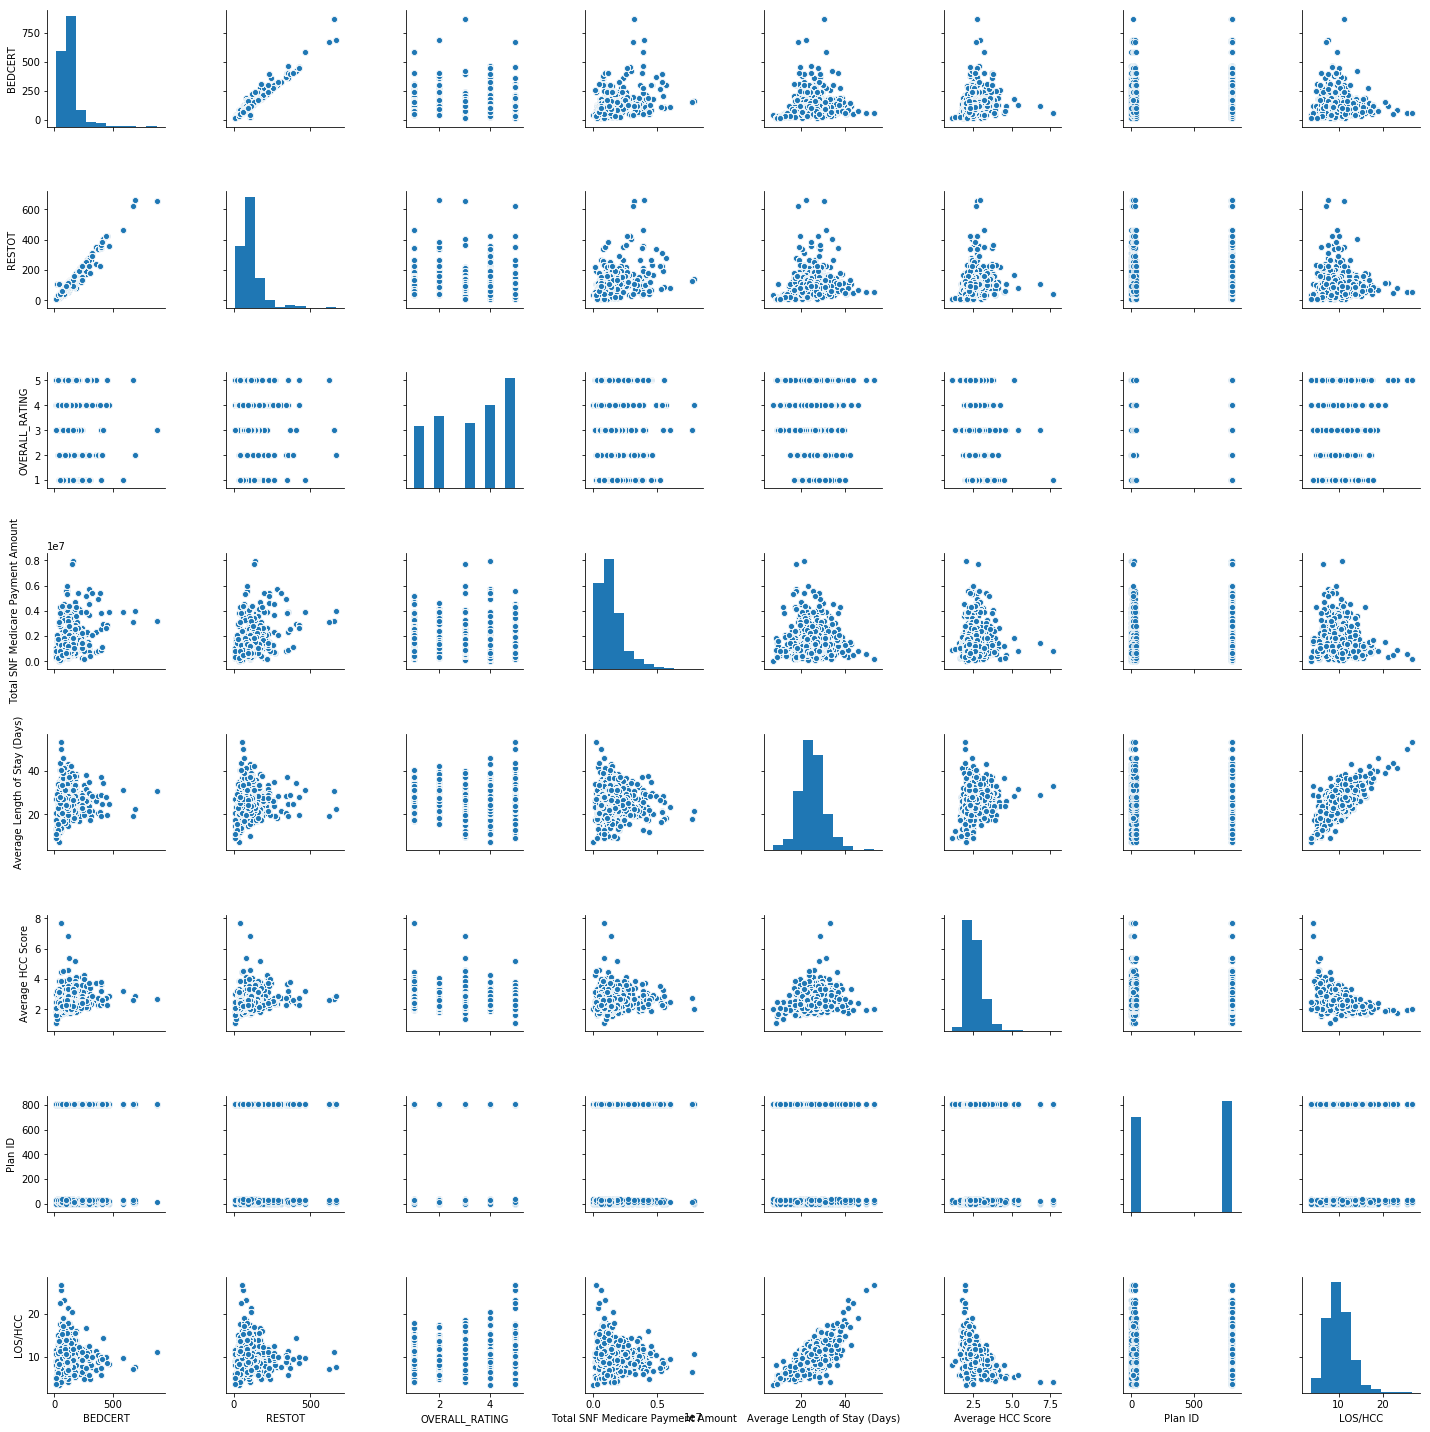

In [19]:
# drop ID columns
na_removed_copy = na_removed_data.drop(['PROVNUM','Provider ID', 'PROVNAME'],axis=1 )

# add length of stay / HCC ratio. This will normalize length of stay - providers with a true need for 
# longer stays because of critical nature of patients (high HCC score)

na_removed_copy['LOS/HCC'] = na_removed_copy['Average Length of Stay (Days)']/na_removed_copy['Average HCC Score']

na_removed_copy
# import library
import seaborn as sns

# look at correlations and distributions
sns.pairplot(na_removed_copy)

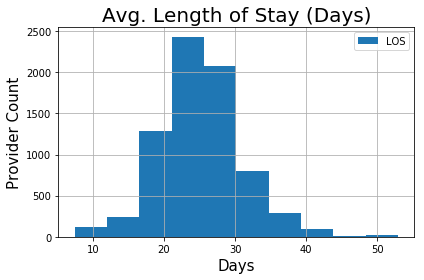

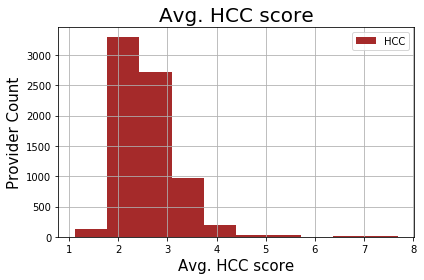

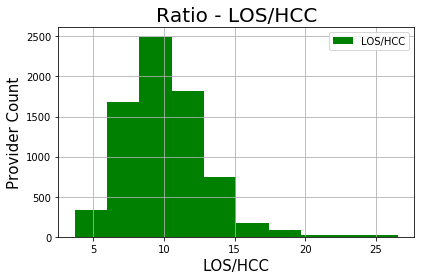

In [20]:
# import library
from matplotlib import pyplot as plt

### plot histogram of LOS ###
plt.hist(na_removed_copy['Average Length of Stay (Days)'], label = 'LOS')


# add y label
plt.ylabel('Provider Count',size = 15)

# add x label
plt.xlabel('Days',size = 15)

# add title
plt.title('Avg. Length of Stay (Days)', size = 20)

# add legend
plt.legend(loc='upper right')

# set layout
plt.tight_layout()

# visualize the graph
plt.grid()
plt.show()

### plot histogram of HCC ###
plt.hist(na_removed_copy['Average HCC Score'], label = 'HCC', color = 'brown')

# add y label
plt.ylabel('Provider Count',size = 15)

# add x label
plt.xlabel('Avg. HCC score',size = 15)

# add title
plt.title('Avg. HCC score', size = 20)

# add legend
plt.legend(loc='upper right')

# set layout
plt.tight_layout()

# visualize the graph
plt.grid()
plt.show()


### plot histogram of LOS/HCC ###
plt.hist(na_removed_copy['LOS/HCC'], label = 'LOS/HCC', color = 'green')

# add y label
plt.ylabel('Provider Count',size = 15)

# add x label
plt.xlabel('LOS/HCC',size = 15)

# add title
plt.title('Ratio - LOS/HCC', size = 20)

# add legend
plt.legend(loc='upper right')

# set layout
plt.tight_layout()

# visualize the graph
plt.grid()
plt.show()

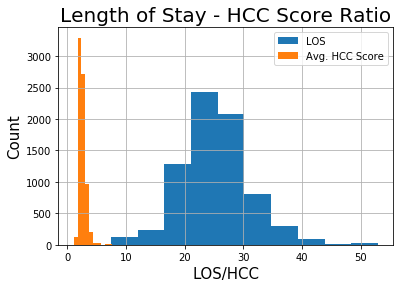

In [21]:
# overlapping histograms
### plot histogram of LOS/HCC ###
plt.hist(na_removed_copy['Average Length of Stay (Days)'], label = 'LOS')
plt.hist(na_removed_copy['Average HCC Score'], label = 'Avg. HCC Score')

# add y label
plt.ylabel('Count',size = 15)

# add x label
plt.xlabel('LOS/HCC',size = 15)

# add title
plt.title('Length of Stay - HCC Score Ratio', size = 20)

# add legend
plt.legend(loc='upper right')

# visualize the graph
plt.grid()
plt.show()

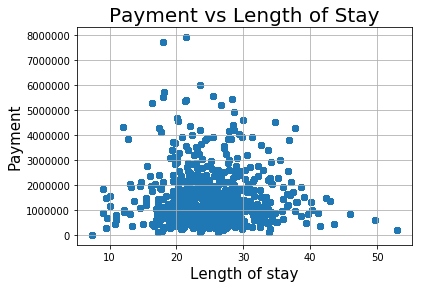

In [22]:
# csot vs stay
plt.scatter(na_removed_copy['Average Length of Stay (Days)'],na_removed_copy['Total SNF Medicare Payment Amount'])
            
# add x label
plt.ylabel('Payment',size = 15)
            
# add y label
plt.xlabel('Length of stay',size = 15)

# add title
plt.title('Payment vs Length of Stay', size = 20)
            
# visualize the graph
plt.grid()
plt.show()